### Getting the Data:

In [3]:
import pandas as pd
import numpy as np
from craigslist import CraigslistHousing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re


sns.set_style("darkgrid", {"axes.facecolor": ".95"})

matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

`#this is what I am adding:
bedrooms = row.find('span', {'class':'housing'})
if bedrooms:
    info = bedrooms.text.replace("\n", "").replace("-","")
else:
    info = None
if info:
    num_bed = re.findall(r"\dbr",info)
    num_bed = (int(num_bed[0].replace("br", ""))
                               if num_bed else None)
else: 
    num_bed = None
if info:
    sq_feet = re.findall(r"\d{1,6}ft2", info)
    sq_feet = int(sq_feet[0].replace("ft2", "")) if sq_feet else None
else:
    sq_feet = None`

In [4]:
cl = CraigslistHousing(site='sfbay', area='sfc', category='apa')
results = cl.get_results(limit = 2500, sort_by='newest')

In [5]:
data = pd.DataFrame(results)

### Looking at the data:

In [6]:
data.head()

,datetime,geotag,has_image,has_map,id,name,num_bed,price,sq_feet,url,where
0,2016-09-07 21:52,None,True,True,5732642902,Sunny/Quiet/Large Museum Parc Condo across Mos...,1,$3400,946,http://sfbay.craigslist.org/sfc/apa/5732642902...,financial district
1,2016-09-07 21:52,None,False,False,5732644462,"Large Quiet Museum Parc Condo, Convenient Locat'n",1,$3400,946,http://sfbay.craigslist.org/sfc/apa/5732644462...,financial district
2,2016-09-07 21:50,None,True,True,5771509939,NEWLY REMODELED STUDIO,None,$1350,200,http://sfbay.craigslist.org/sfc/apa/5771509939...,bernal heights
3,2016-09-07 21:49,None,True,True,5761955955,Great and Convenient Studio,1,$3000,475,http://sfbay.craigslist.org/sfc/apa/5761955955...,north beach / telegraph hill
4,2016-09-07 21:49,None,True,True,5771510546,Sunny and Ridiculously Spacious Edwardian Flat...,3,$6000,1700,http://sfbay.craigslist.org/sfc/apa/5771510546...,mission district


In [7]:
data.to_csv("/Users/alexpapiu/Documents/Data/Craigslist/data_ap_1.csv")

In [8]:
data.shape

(2500, 11)

In [10]:
data.dtypes

datetime     object
geotag       object
has_image      bool
has_map        bool
id           object
name         object
num_bed      object
price        object
sq_feet      object
url          object
where        object
dtype: object

### Data Cleaning:

In [11]:
data.isnull().sum(0) #checking how many columns have NA's

datetime        0
geotag       2500
has_image       0
has_map         0
id              0
name            0
num_bed       443
price           5
sq_feet      1362
url             0
where          41
dtype: int64

In [ ]:
data["sq_feet"] = data["sq_feet"].astype(float)

In [12]:
def clean_data(data):
    data.datetime = pd.to_datetime(data.datetime)
    data["sq_feet"] = data["sq_feet"].astype(float)
    
    data = (data.dropna(subset = ["price"]) # eliminate things with no price
                .assign(price = data["price"].str.lstrip("$").astype(float)) #make the price numeric
                .query("price > 1 & price < 30000") #eliminate crazy prices
                .assign(name = data["name"].str.replace("/", " ")) #replace "/" with " "
                .assign(hour = data["datetime"].dt.hour, #extract time feats
                        dayofweek = data["datetime"].dt.dayofweek))
    return(data)

In [13]:
data = clean_data(data)

In [14]:
data.shape

(2492, 13)

## Visualizing the data:

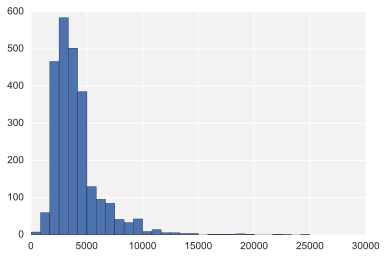

In [15]:
data.price.hist(bins = 30) # right skewed.

In [16]:
np.median(data.price)

3500.0

In [17]:
np.std(data.price)

2358.7586446958776

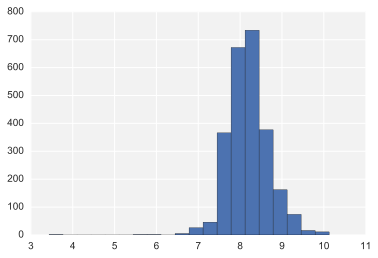

In [18]:
np.log1p(data.price).hist(bins = 20)

### Looking at the number of bedrooms:

In [19]:
data.groupby("num_bed")["price"].aggregate(["count","mean"])

,count,mean
num_bed,,
1,917,3069.861505
2,729,4639.015089
3,301,6386.239203
4,76,8212.013158
5,16,9198.750000
6,4,21125.000000
7,4,13125.000000
8,3,13433.333333


### How about the homes with no number of bedrooms? A lot of them are studios!

In [20]:
data[data["num_bed"].isnull()]

,datetime,geotag,has_image,has_map,id,name,num_bed,price,sq_feet,url,where,dayofweek,hour
2,2016-09-07 21:50:00,None,True,True,5771509939,NEWLY REMODELED STUDIO,None,1350,200,http://sfbay.craigslist.org/sfc/apa/5771509939...,bernal heights,2,21
7,2016-09-07 21:46:00,None,True,True,5771509812,"SPACIOUS, NEWLY REMODELED 3 BR 1 BATH",None,3000,None,http://sfbay.craigslist.org/sfc/apa/5771509812...,bernal heights,2,21
16,2016-09-07 21:28:00,None,True,True,5771487333,1br - Spacious and cozy 1 bedroom- Outer Sunset,None,1600,None,http://sfbay.craigslist.org/sfc/apa/5771487333...,sunset / parkside,2,21
21,2016-09-07 21:22:00,None,True,True,5761392735,Furnished Penthouse Studio with 3 4 Bath,None,1295,200,http://sfbay.craigslist.org/sfc/apa/5761392735...,sunset / parkside,2,21
23,2016-09-07 21:22:00,None,True,True,5766216462,Spacious Bright Nob Hill Studio (at Jackson La...,None,2300,475,http://sfbay.craigslist.org/sfc/apa/5766216462...,nob hill,2,21
28,2016-09-07 21:02:00,None,True,True,5771462517,Delux Studio with Beautiful Sunsets and Coit T...,None,3414,None,http://sfbay.craigslist.org/sfc/apa/5771462517...,financial district,2,21
29,2016-09-07 20:59:00,None,True,True,5771464772,"(**Sunny, Remodeled Studio located at Pac Heig...",None,1750,265,http://sfbay.craigslist.org/sfc/apa/5771464772...,marina / cow hollow,2,20
37,2016-09-07 20:41:00,None,True,True,5771460199,Studio with Fantastic Bay and Bay Bridge View!,None,2863,None,http://sfbay.craigslist.org/sfc/apa/5771460199...,financial district,2,20
60,2016-09-07 20:05:00,None,True,True,5771437480,Cozy apartment used as a 2 bedroom,None,3150,None,http://sfbay.craigslist.org/sfc/apa/5771437480...,russian hill,2,20
74,2016-09-07 19:52:00,None,True,True,5763485146,**Modern Studio Apartment - Top Floor - Newly ...,None,2295,None,http://sfbay.craigslist.org/sfc/apa/5763485146...,lower nob hill,2,19


Ok so let's do the following - if we find studio in the descprition and num_bedroom is NaN we will list it as studio:

In [21]:
data.loc[data["name"].str.contains("[Ss]tudio"), "num_bed"] = "Studio"

In [22]:
data

,datetime,geotag,has_image,has_map,id,name,num_bed,price,sq_feet,url,where,dayofweek,hour
0,2016-09-07 21:52:00,None,True,True,5732642902,Sunny Quiet Large Museum Parc Condo across Mos...,1,3400,946,http://sfbay.craigslist.org/sfc/apa/5732642902...,financial district,2,21
1,2016-09-07 21:52:00,None,False,False,5732644462,"Large Quiet Museum Parc Condo, Convenient Locat'n",1,3400,946,http://sfbay.craigslist.org/sfc/apa/5732644462...,financial district,2,21
2,2016-09-07 21:50:00,None,True,True,5771509939,NEWLY REMODELED STUDIO,None,1350,200,http://sfbay.craigslist.org/sfc/apa/5771509939...,bernal heights,2,21
3,2016-09-07 21:49:00,None,True,True,5761955955,Great and Convenient Studio,Studio,3000,475,http://sfbay.craigslist.org/sfc/apa/5761955955...,north beach / telegraph hill,2,21
4,2016-09-07 21:49:00,None,True,True,5771510546,Sunny and Ridiculously Spacious Edwardian Flat...,3,6000,1700,http://sfbay.craigslist.org/sfc/apa/5771510546...,mission district,2,21
5,2016-09-07 21:48:00,None,True,True,5767590124,One Bedroom Apartment (7),1,2675,None,http://sfbay.craigslist.org/sfc/apa/5767590124...,haight ashbury,2,21
6,2016-09-07 21:47:00,None,True,True,5767874109,One Bedroom Apartment(12),1,2650,None,http://sfbay.craigslist.org/sfc/apa/5767874109...,haight ashbury,2,21
7,2016-09-07 21:46:00,None,True,True,5771509812,"SPACIOUS, NEWLY REMODELED 3 BR 1 BATH",None,3000,None,http://sfbay.craigslist.org/sfc/apa/5771509812...,bernal heights,2,21
8,2016-09-07 21:46:00,None,True,True,5771513885,"1 Bath, Bright & Clean Suite w Private Deck, U...",1,1875,500,http://sfbay.craigslist.org/sfc/apa/5771513885...,sunset / parkside,2,21
9,2016-09-07 21:43:00,None,True,True,5771512273,Renovated Full Floor Amazing Residence! Large ...,2,6200,None,http://sfbay.craigslist.org/sfc/apa/5771512273...,Castro,2,21


In [23]:
data.groupby("num_bed")["price"].aggregate(["count","mean"])["mean"]

,count,mean
num_bed,,
1,901,3088.104329
2,726,4641.490358
3,301,6386.239203
4,76,8212.013158
5,16,9198.750000
6,4,21125.000000
7,4,13125.000000
8,3,13433.333333
Studio,262,2317.072519


In [27]:
data.loc[data["num_bed"].isin(["5", "6", "7", "8"]), "num_bed"] = "5 or more"

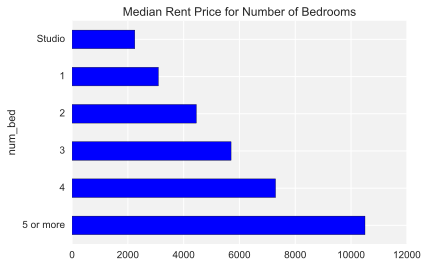

In [40]:
(data.groupby("num_bed")["price"]
     .aggregate(["count","median"])
     .sort_values("median", ascending = False)["median"]
     .plot(kind = "barh", title = "Median Rent Price for Number of Bedrooms"))

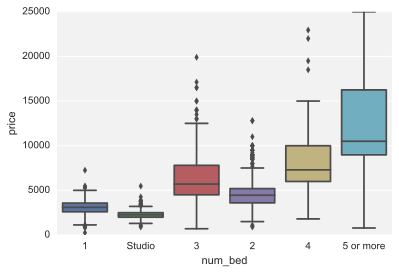

In [93]:
sns.boxplot(x = "num_bed", y = "price", data = data)

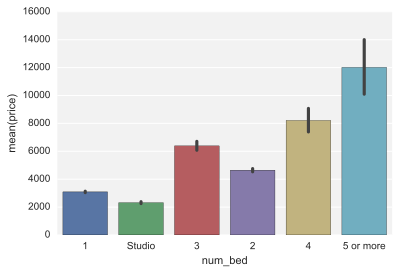

In [98]:
sns.barplot(x = "num_bed", y = "price", data = data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ff33550>]], dtype=object)

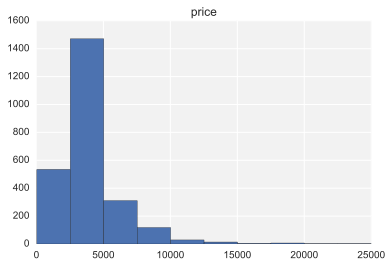

In [99]:
data[["num_bed", "price"]].hist()

### A look at Square footage:

In [58]:
data["sq_feet"] = data["sq_feet"].astype(float)

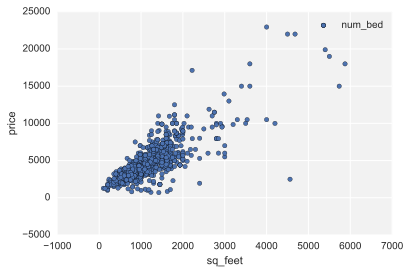

In [67]:
data.plot(x = "sq_feet", y = "price", kind = "scatter", label = "num_bed")

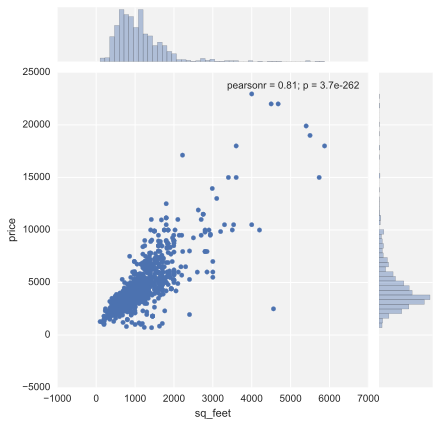

In [76]:
sns.jointplot(x = "sq_feet", y = "price", data=data)

(0, 12000)

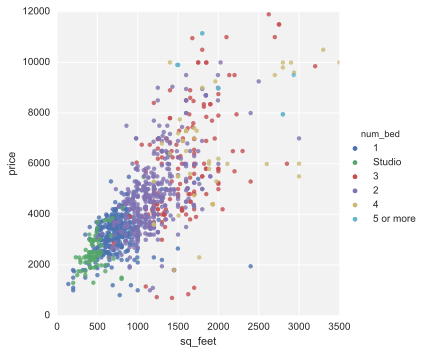

In [92]:
plt.figure(figsize=(12,12))
sns.lmplot(x = "sq_feet", y = "price", data=data, hue="num_bed", fit_reg=False)
plt.xlim(0, 3500)
plt.ylim(0, 12000)

In [104]:
data.columns

Index(['datetime', 'geotag', 'has_image', 'has_map', 'id', 'name', 'num_bed',
       'price', 'sq_feet', 'url', 'where', 'dayofweek', 'hour'],
      dtype='object')

Very nice Linear relation

Relation by neighbohood and number of bedroom:

In [105]:
data.groupby(["num_bed", "where"])["price"].aggregate(["count", "mean"])

count         mean
num_bed where                                           
1       SOMA / south beach              120  3550.591667
        San Francisco                     5  2194.000000
        USF / panhandle                   8  2631.250000
        alamo square / nopa              13  2861.538462
        bayview                          19  2436.736842
        bernal heights                    9  2934.444444
        castro / upper market            25  3291.280000
        cole valley / ashbury hts         8  2897.500000
        downtown / civic / van ness      36  3012.944444
        excelsior / outer mission         8  1866.375000
        financial district               19  3805.315789
        glen park                         7  2783.571429
        haight ashbury                   13  3053.076923
        hayes valley                     14  3239.142857
        ingleside / SFSU / CCSF          23  2056.826087
        inner richmond                   13  2734.076923
        inner sunset / UCSF              29  2490.551724
        laurel hts / presidio            19  3034.210526
        lower haight                      3  3081.666667
        lower nob hill                   55  2852.690909
        lower pac hts                    39  3324.871795
        marina / cow hollow              50  3372.580000
        mission district                 35  3176.828571
        nob hill                         66  3268.696970
        noe valley                       22  3415.909091
        north beach / telegraph hill     28  3022.607143
        other                             6  2019.666667
        pacific heights                  53  3690.094340
        portola district                  3  1816.666667
        potrero hill                     25  3624.680000
...                                     ...          ...
Studio  alamo square / nopa               5  2268.000000
        bayview                           4  1600.000000
        bernal heights                    1  1495.000000
        castro / upper market             3  2463.333333
        cole valley / ashbury hts         1  2195.000000
        downtown / civic / van ness      21  2257.238095
        excelsior / outer mission         1  1995.000000
        financial district                8  3037.250000
        haight ashbury                    1  1995.000000
        hayes valley                     11  2830.636364
        ingleside / SFSU / CCSF           3  1433.000000
        inner richmond                    2  1980.000000
        inner sunset / UCSF               5  1937.000000
        laurel hts / presidio             2  2522.500000
        lower haight                      2  2712.500000
        lower nob hill                   51  2177.960784
        lower pac hts                     2  2247.500000
        marina / cow hollow               8  2473.000000
        mission district                  7  2455.000000
        nob hill                         18  2313.055556
        noe valley                        3  2463.333333
        north beach / telegraph hill      2  2897.500000
        other                             4  2248.750000
        pacific heights                  17  2587.176471
        potrero hill                      2  3497.500000
        richmond / seacliff               8  2045.000000
        russian hill                      6  2656.666667
        sunset / parkside                 3  1748.333333
        tenderloin                       39  1914.615385
        western addition                  1  2250.000000

[183 rows x 2 columns]

### Feature Extraction:
So what kind of features should be important here?
- Location
- Number of Bedrooms/Baths
- Desciption of Property
- Square Footage

#### Let's start with "where":

In [41]:
location = data["where"]

In [42]:
location.unique().shape #unique locations.

(69,)

Let's reduce the cardinality of the location feature a bit:

In [43]:
loc_count = location.value_counts()

In [44]:
mask = data["where"].isin(loc_count[loc_count < 3].index)

In [45]:
data.ix[mask, "where"] = "other" #replace adresses that only appear once or twice with "other"

In [46]:
location.unique().shape #unique locations.

(39,)

In [50]:
price_by_locations = (data.groupby("where")["price"]
                          .aggregate(["median", "count"])
                          .query("count > 100")
                          .sort_values("median"))

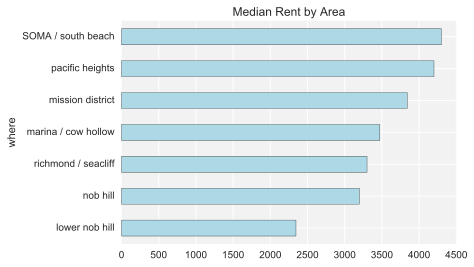

In [51]:
#matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
price_by_locations["median"].plot.barh(title = "Median Rent by Area", color = "lightblue")

In [464]:
popular_areas = price_by_locations.query("count > 85").index

In [465]:
popular_areas

Index(['lower nob hill', 'sunset / parkside', 'richmond / seacliff',
       'nob hill', 'marina / cow hollow', 'SOMA / south beach',
       'mission district', 'pacific heights'],
      dtype='object', name='where')

In [472]:
popular_places_data = data[data["where"].isin(popular_areas)].query("price < 10000")

In [ ]:
data.price.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14fc61b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x15036ca58>]], dtype=object)

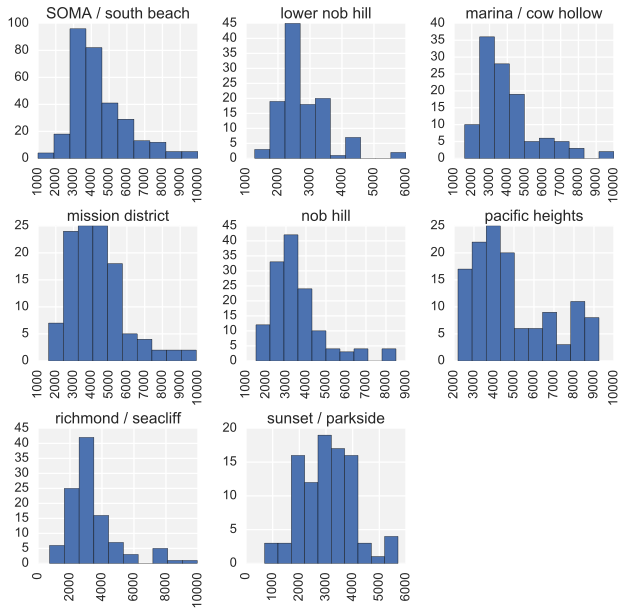

In [707]:
popular_places_data.loc[:,["price", "where"]].hist(by="where", figsize=(10, 10)) #the axes are bad here.

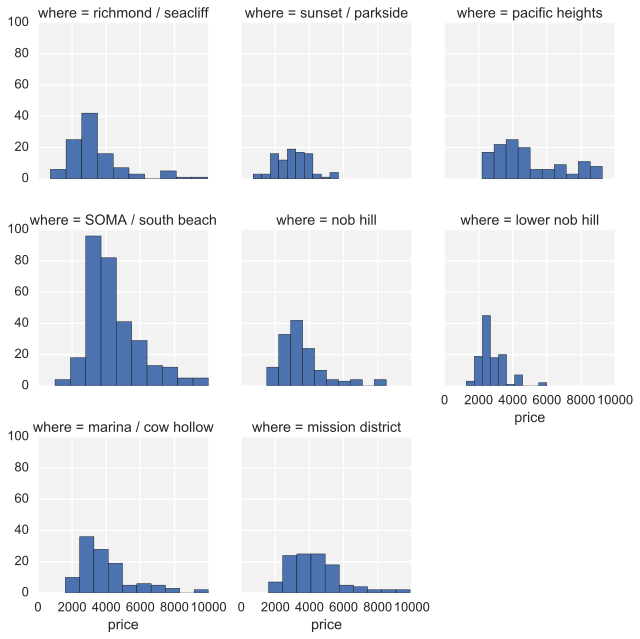

In [698]:
(sns.FacetGrid(popular_places_data, col="where", aspect=1, col_wrap = 3)
    .map(plt.hist, "price"))

### How about the date? 

The questions is however: should I include this in the model? 

In [665]:
data.datetime = pd.to_datetime(data.datetime
                              )
data = (data.assign(hour = data["datetime"].dt.hour, #extract time feats
             minute = data["datetime"].dt.minute,
             dayofweek = data["datetime"].dt.dayofweek))

In [668]:
data.loc[:3,"dayofweek":"minute"]

,dayofweek,hour,minute
0,0,0,42
1,0,0,41
2,0,0,39
3,0,0,36


Hour should probably be the most important here:

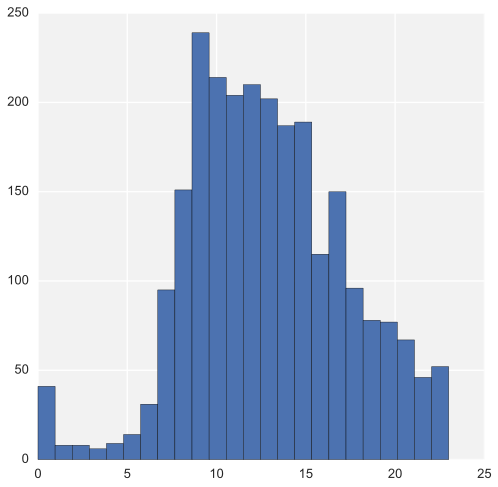

In [676]:
data.hour.hist(bins = 24)

In [697]:
data.assign(timeofday = pd.cut(data["hour"], 6))

,datetime,geotag,has_image,has_map,id,name,price,url,where,dayofweek,hour,minute,timeofday
0,2016-09-05 00:42:00,None,True,True,5762113890,Beautifully Remodeled 1BD/1BA includes Parking,2700,http://sfbay.craigslist.org/sfc/apa/5762113890...,richmond / seacliff,0,0,42,"(-0.023, 3.833]"
1,2016-09-05 00:41:00,None,True,True,5757241629,♥ ♥ 5BR Lake Street Beautiful House for Rent! ♥,8500,http://sfbay.craigslist.org/sfc/apa/5757241629...,richmond / seacliff,0,0,41,"(-0.023, 3.833]"
2,2016-09-05 00:39:00,None,True,True,5719322970,"♥ Quiet, fully detached, 3000 sqft HOUSE for rent",5500,http://sfbay.craigslist.org/sfc/apa/5719322970...,sunset / parkside,0,0,39,"(-0.023, 3.833]"
3,2016-09-05 00:36:00,None,True,True,5766502380,★★ Merced Manor beauty - fully detached BIG ho...,5500,http://sfbay.craigslist.org/sfc/apa/5766502380...,west portal / forest hill,0,0,36,"(-0.023, 3.833]"
4,2016-09-05 00:35:00,None,True,True,5766502082,★★ 5BR Lake District House near Presidio for R...,8500,http://sfbay.craigslist.org/sfc/apa/5766502082...,laurel hts / presidio,0,0,35,"(-0.023, 3.833]"
5,2016-09-05 00:33:00,None,True,True,5766489579,[Studio at Gramercy Towers features expansive ...,2200,http://sfbay.craigslist.org/sfc/apa/5766489579...,downtown / civic / van ness,0,0,33,"(-0.023, 3.833]"
6,2016-09-05 00:21:00,None,False,False,5766497614,common roof deck & secure garage parking with ...,1000,http://sfbay.craigslist.org/sfc/apa/5766497614...,hayes valley,0,0,21,"(-0.023, 3.833]"
7,2016-09-05 00:20:00,None,False,False,5766497410,common roof deck & secure garage parking with ...,1000,http://sfbay.craigslist.org/sfc/apa/5766497410...,hayes valley,0,0,20,"(-0.023, 3.833]"
8,2016-09-05 00:18:00,None,True,True,5758944800,Master Suite Available - Incredible Rooftop View,2100,http://sfbay.craigslist.org/sfc/apa/5758944800...,potrero hill,0,0,18,"(-0.023, 3.833]"
9,2016-09-05 00:14:00,None,True,True,5766495623,Spacious House in Mission Terrace 3Bd/1Ba,4000,http://sfbay.craigslist.org/sfc/apa/5766495623...,excelsior / outer mission,0,0,14,"(-0.023, 3.833]"


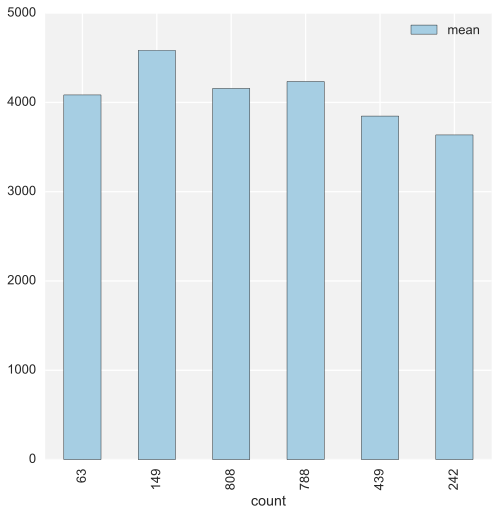

In [708]:
(data.assign(timeofday = pd.cut(data["hour"], 6))
     .groupby("timeofday")["price"]
     .aggregate(["mean", "count"]).plot("count", kind = "bar", colormap='Paired'))

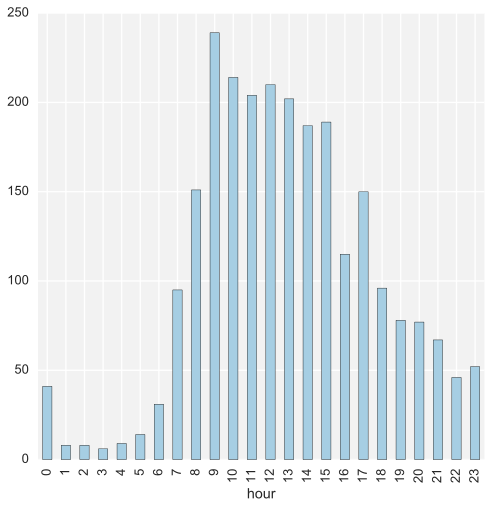

In [714]:
(data.groupby("hour")["price"]
     .aggregate(["mean", "count"])["count"]
     .plot(kind = "bar", colormap='Paired'))

### How about the desription/title?

In [474]:
data.name.iloc[:5]

0       Beautifully Remodeled 1BD/1BA includes Parking
1      ♥ ♥ 5BR Lake Street Beautiful House for Rent! ♥
2    ♥ Quiet, fully detached, 3000 sqft HOUSE for rent
3    ★★ Merced Manor beauty - fully detached BIG ho...
4    ★★ 5BR Lake District House near Presidio for R...
Name: name, dtype: object

In [556]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [476]:
vect = CountVectorizer(stop_words="english", max_df = 0.3, min_df = 5)
X = vect.fit_transform(data["name"])

In [477]:
vect.get_feature_names()[300:310] #hmm I don't know how useful these are.

['lndry',
 'lobby',
 'loc',
 'located',
 'location',
 'loft',
 'lombard',
 'long',
 'lots',
 'love']

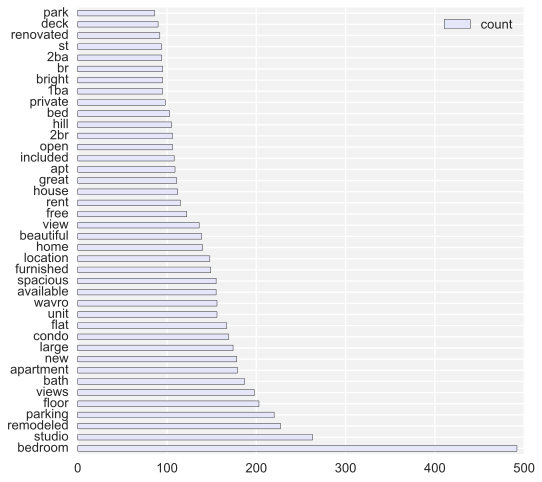

In [491]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

(pd.DataFrame({"count":X.toarray().sum(0)}, index = vect.get_feature_names())
   .sort_values("count", ascending = False)
   .iloc[:40]
   .plot.barh(color = "lavender"))

This is going to be tricky since:
- I need to eliminate numbers like 1000 or 1600 since these are rents, but I want to keep numbers like 1br since those are important.

### Creating Matrices for Sklearn:

We will create a few matrices:
    - dummy variables for the categorical features - mainly location
    - a bag of words (perhaps tf - idf) for the title of the listing

In [103]:
data.isnull().sum(0)

datetime        0
geotag       2492
has_image       0
has_map         0
id              0
name            0
num_bed       199
price           0
sq_feet      1357
url             0
where          40
dayofweek       0
hour            0
dtype: int64

In [1089]:
data_cat = pd.get_dummies(data[["has_image", "has_map", "where"]])

In [493]:
data_cat.head()

,has_image,has_map,"where_3800 North El Mirage Rd., #3400, Avondale, AZ 85392",where_SOMA / south beach,where_San Francisco,where_USF / panhandle,where_alamo square / nopa,where_bayview,where_bernal heights,where_castro / upper market,...,where_portola district,where_potrero hill,where_richmond / seacliff,where_russian hill,where_sunset / parkside,where_tenderloin,where_twin peaks / diamond hts,where_visitacion valley,where_west portal / forest hill,where_western addition
0,True,True,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,True,True,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,True,True,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,True,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,True,True,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [494]:
data_cat.shape

(2489, 41)

In [495]:
vect = CountVectorizer(stop_words="english", max_df = 0.3, min_df = 5)
data_text = pd.DataFrame(vect.fit_transform(data["name"]).toarray(), columns = vect.get_feature_names())

In [496]:
data_text.head()

,00,10,100,1000,1008,101,11,12,1300,1600,...,weekend,weeks,welcome,wi,windows,wonderful,wood,work,yard,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [497]:
data_text.shape

(2489, 513)

### Models:

In [539]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.cross_validation import cross_val_score

In [499]:
model = Ridge()

In [506]:
data.shape

(2489, 9)

In [507]:
data_cat.shape

(2489, 41)

In [508]:
model.fit(data_cat, data.price)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [550]:
np.sqrt(-cross_val_score(model, data_cat, data.price, scoring = "mean_squared_error")).mean()

2175.7318219711519

In [555]:
np.sqrt(-cross_val_score(model, data[["has_map", "has_image"]], data.price, scoring = "mean_squared_error")).mean()

2304.057375995701

### Model on bag of Words:

In [631]:
model = Ridge()

In [632]:
vect = CountVectorizer(stop_words="english", ngram_range=(1,1), min_df = 5) 
data_text = pd.DataFrame(vect.fit_transform(data["name"]).toarray(), columns = vect.get_feature_names())

In [633]:
model.fit(data_text, data.price)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [634]:
np.sqrt(-cross_val_score(model, data_text, data.price, scoring = "mean_squared_error")).mean()

2024.2041728957054

In [635]:
X = np.hstack((data_text.values, data_cat.values))

In [636]:
X.shape

(2489, 554)

In [637]:
np.sqrt(-cross_val_score(model, X, data.price, scoring = "mean_squared_error")).mean()

1954.7868686992088

In [638]:
-cross_val_score(model, X, data.price, scoring = "mean_absolute_error")

array([ 1319.26262506,  1243.08785822,  1322.69391115])

Ok so we get around:
- 1826.7 with both text and location
- 2024 with text only
- 2175 with location only
- 2320 with taking the mean

### creating function to build the model:

In [ ]:
def build_model(data):
    

### Interpreting the Results:

#### Coeffs:

In [639]:
model.fit(data_text, data.price)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [640]:
coefs = pd.DataFrame({"coef":model.coef_}, index = data_text.columns)

In [658]:
small_big_coeffs = pd.concat([coefs.sort_values("coef").head(15), 
                              coefs.sort_values("coef").tail(15)])

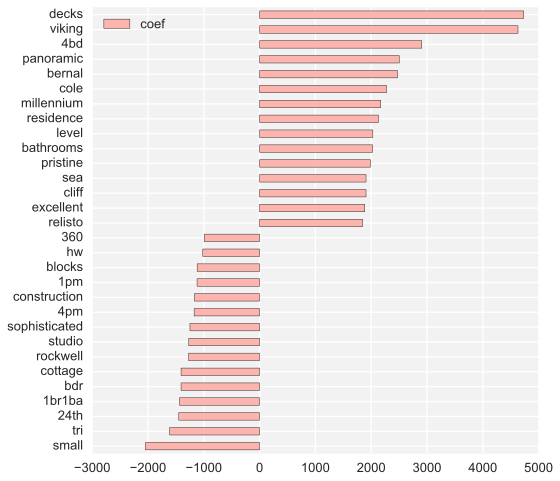

In [716]:
small_big_coeffs.plot.barh(colormap='Pastel1')

In [721]:
model

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### What matters for each entry:

In [727]:
X = np.hstack((data_text.values, data_cat.values))
model = Ridge().fit(X, data.price)

In [810]:
n = 20 #this is the example we will look at:

In [811]:
model.predict(X[n,])

/Users/alexpapiu/anaconda/lib/python3.4/site-packages/sklearn/utils/validation.py:386: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.



array([ 4086.08470422])

In [812]:
data.price[n]

3400.0

In [813]:
data.iloc[n]

datetime                                   2016-09-04 22:42:00
geotag                                                    None
has_image                                                 True
has_map                                                   True
id                                                  5766459574
name                        Multiple 1 Bedroom Units ~ J.Wavro
price                                                     3400
url          http://sfbay.craigslist.org/sfc/apa/5766459574...
where                                           lower nob hill
dayofweek                                                    6
hour                                                        22
minute                                                      42
Name: 20, dtype: object

In [814]:
feats = np.hstack([data_text.columns.values, data_cat.columns.values])
coefs = pd.DataFrame({"coef":model.coef_}, index = feats)

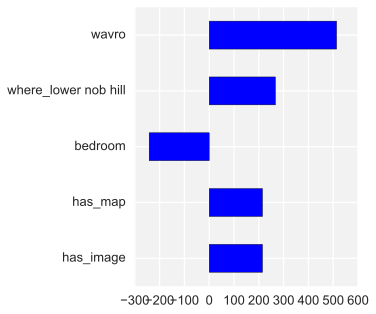

In [815]:
matplotlib.rcParams['figure.figsize'] = (4.0, 5.0)
(pd.DataFrame({"appears":X[n], "values":model.coef_}, index = feats)
  .query("appears != 0")
  .assign(abs_coef = lambda x: np.abs(x["values"]))
  .sort_values("abs_coef")
  .tail(5)
  .loc[:,"values"]
  .plot(kind = "barh"))
  


In [809]:
pd.DataFrame({"appears":X[n], "values":model.coef_}, index = feats).query("appears != 0")

,appears,values
deck,1,797.729971
heart,1,338.132493
living,1,378.957541
marina,1,-308.359903
roof,1,-237.048583
where_marina / cow hollow,1,1214.030037


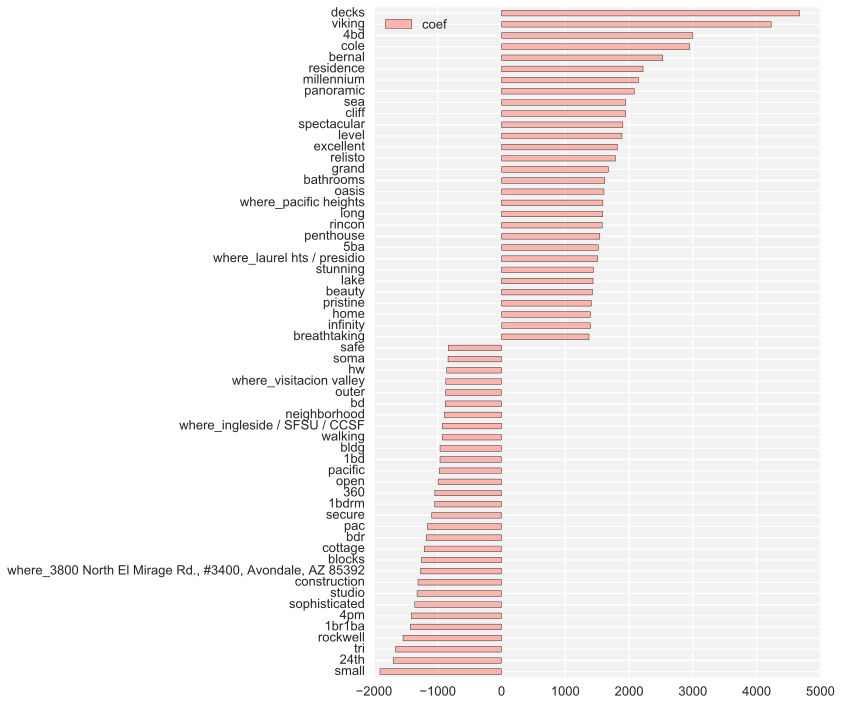

In [745]:

matplotlib.rcParams['figure.figsize'] = (8.0, 12.0)
coefs = pd.DataFrame({"coef":model.coef_}, index = feats)
small_big_coeffs = pd.concat([coefs.sort_values("coef").head(30), 
                              coefs.sort_values("coef").tail(30)])
small_big_coeffs.plot.barh(colormap='Pastel1')

### Idea: 
### -run a Lasso model on the bigrams in order to pick only the important ones like say - "2 br"
### -then use Ridge on the selected vocabulary

### Building a function that outputs the features (n grams) chosen by the Lasso model:

In [1069]:
def build_vocab(data, alpha, ngram = 1, min_df = 3, max_df = 0.5):
    vect = CountVectorizer(stop_words="english", ngram_range=(1,ngram), min_df = min_df, max_df = max_df) 
    X = vect.fit_transform(data["name"])
    
    model = Lasso(alpha = alpha)
    model.fit(X, data.price)
    feats = np.array(vect.get_feature_names())
    feats_chosen = feats[model.coef_ != 0] #picking features that are non-zero
    return(feats_chosen)

In [1082]:
vocab = build_vocab(data, ngram = 3, alpha = 3, min_df = 1)

In [1078]:
vocab = np.hstack((vocab, ["1 bedroom", "2 bedroom", "3 bedroom"]))

In [1083]:
vocab

array(['11', '12', '1ba', '1bath', '1bd', '1br', '1br1ba', '1st st', '2ba',
       '2br', '2x2', '338', '3bd', '3bed', '3br', '3br 2ba', '425', '4bd',
       '5ba', '5br', '6br', '6br ba', 'amsi', 'apartment', 'apt', 'ave',
       'ba', 'ba garden', 'ba potrero', 'ba potrero hill', 'balcony',
       'bart', 'bath house decks', 'bathrooms', 'bathrooms car',
       'bathrooms car garage', 'bay', 'bd ba potrero', 'bdrm', 'beautiful',
       'beautiful renovated', 'beauty', 'bed bath', 'bedroom',
       'bedroom apartment', 'bedroom perfect roommates',
       'bedroom spectacular', 'bedrooms bathrooms car', 'belway', 'bernal',
       'bernal home', 'bespoke', 'best', 'blocks', 'br', 'brand new',
       'brand new stunning', 'brannan', 'bright', 'bright sunny',
       'building', 'bv', 'car', 'car garage', 'cars', 'casey', 'charming',
       'city', 'city bay', 'classic', 'clean', 'cliff', 'close',
       'community', 'concession', 'condo', 'corner', 'corner house levels',
       'cozy', 'c

In [1074]:
vect = CountVectorizer(vocabulary=vocab)
X = vect.fit_transform(data["name"])

In [1075]:
X

<2489x140 sparse matrix of type '<class 'numpy.int64'>'
	with 6823 stored elements in Compressed Sparse Row format>